### Geometric Brownian Motion

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [66]:
def geo_paths(S, T, r, rf, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = domestic interest rate in annual %
    #rf = foreign interest rate in annual %
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    ST = np.log(S) +  np.cumsum(((r - rf - sigma**2/2)*dt + sigma*np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0)
    return np.exp(ST)


Text(0.5, 1.0, 'Geometric Brownian Motion')

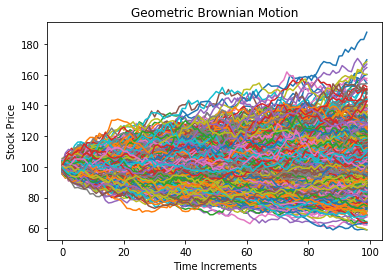

In [67]:
# EXAMPLE
S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # domestic interest rate in annual %
rf = 0.02 # foreign interest rate in annual %
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

paths= geo_paths(S,T,r,rf,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

### Monte carlo pricing

In [68]:
def monte_carlo_pricing(Option_type, S, K, T, r, rf, sigma, steps, N):
    paths= geo_paths(S, T, r, q,sigma, steps, N)
    if Option_type == "c":
        payoffs = np.maximum(paths[-1]-K, 0)
        option_price = np.exp(-r*T)*np.mean(payoffs) #discounting back to present value
        print("Simulated price of call is ", option_price)
    elif Option_type == "p":
        payoffs = np.maximum(K-paths[-1], 0)
        option_price = np.exp(-r*T)*np.mean(payoffs) #discounting back to present value
        print("Simulated price of put is ", option_price)
    else:
        print("incorrect parameters")

In [69]:
monte_carlo_pricing("g", S, K, T, r, rf, sigma, steps, N)

incorrect parameters


In [70]:
monte_carlo_pricing("c", S, K, T, r, rf, sigma, steps, N)

Simulated price of call is  3.909993213952184


### Black scholes pricing

In [73]:
def black_scholes_pricing(Option_type,S,K,T,r,rf,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = domestic interest rate in annual %
    #rf = foreign interest rate in annual %
    # sigma = volatility 
    
    Output
    # price = value of the option 
    """
    d1 = (np.log(S/K) + (r - rf + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    if Option_type == "c":
        option_price = S * np.exp(-rf*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
        return option_price
    elif Option_type == "p":
        option_price = K * np.exp(-r*T)* norm.cdf(-d2) - S * np.exp(-rf*T)*norm.cdf(d1)
        return option_price
    else:
        print("incorrect parameters")

bs_price = black_scholes_pricing("c",S,K,T,r,rf,sigma)
print("Black Scholes Price is",bs_price)

Black Scholes Price is 3.7451887662410783
